In [193]:
from utils.data_handling import *
from utils.sensor_optimisation_gpy_sparse import *
from parameters import *

import sklearn.decomposition
import scipy
import matplotlib.pyplot as plt
np.random.seed(101)
%matplotlib inline

from tqdm import tqdm
from shapely.geometry import Polygon, Point, MultiPoint, MultiPolygon


In [2]:
parameters['i_end'] = 988
parameters['field_name'] = "Tracer"
parameters

{'i_start': 0,
 'i_end': 988,
 'crop': None,
 'field_name': 'Tracer',
 'cov_method': 'sample'}

In [3]:
loaded = initial_load_data(parameters, recompute=False)
ref_vtu, data_df, loc_df, time_df = loaded

  0%|          | 0/1 [00:00<?, ?it/s]

### Loading files from original VTU
==> Import vtu files from 0 to 0


100%|██████████| 1/1 [00:00<00:00,  1.97it/s]


Number of Locations after cropping :  100040
==> Loading from : ../data/temp_data/cache_0_988_None/loc_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/time_Tracer.pkl
==> Loading from : ../data/temp_data/cache_0_988_None/data_Tracer.pkl


In [162]:
buildingshape = dict()
buildingshape[1] = [(-131.01,-57.71),
                    (-122.03,-59.61),
                    (-87.06,25.77),
                    (-28.47,-19.76),
                    (-18.55,-10.27),
                    (-83.28,38.68),
                    (-93.20,31.09)]
buildingshape[2] = [(-91.36,-77.05),
                    (-75.77,-90.79),
                    (-11.47,-41.45),
                    (-11.34,-30.43),
                    (-20.79,-21.93)]
buildingshape[3] = [(-11.47,-41.45),
                    (-5.43,-35.46),
                    (-5.04,-25.76),
                    (-11.34,-30.43)]
buildingshape[4] = [(-11.34,-30.43),
                    (-5.04,-25.76),
                    (-4.911,-22.77),
                    (-16.06,-12.94),
                    (-24.33,-18.81)]

buildingshape[5] = [(-37.06, -85.74),
                    (-26.82, -95.32),
                    (-15.01,-97.24),
                    (-15.54, -101,19),
                    (-1.36, -103,94),
                    (7.68, -59.03),
                    (-0.18, -54,48),
                    (-9.5, -60.83),
                    (-15.15, -77.60),
                    (-23.28, -74.48)]
buildingshape[6] = [(33.93, -59.15),
                    (37.73, -82.27),
                    (65.03, -102.99),
                    (72.91, -96.16),
                    (47.97, -76.64),
                    (46.79, - 66.34),
                    (69.62, -54.24),
                    (131.76, -57.35),
                    (132.35, -48.01),
                    (58.86, -44.66)]
buildingshape[7] = [(50.48, -3.53),
                    (60.70, -17.95),
                    (79.73, -18.62),
                    (73.21, 16.46),
                    (54.97, 18.14)]
buildingshape[8] = [(57.35, 28.86),
                    (71.36, 26.63),
                    (74.41, 45.74),
                    (61.67, 48.68)]
buildingshape[9] = [(-40.95, 93.54),
                    (-34.34, 88.61),
                    (-24.31, 97.45),
                    (-22.11, 97.58),
                    (7.99, 75.07),
                    (14.11, 80.58),
                    (-16.23, 103.52),
                    (-30.92, 103.40)]
buildingshape[10] = [(-50.50, 69.57),
                     (-33.85, 57.29),
                     (-20.39, 62.91),
                     (-44.13, 81.15)]
buildingshape[11] = [(7.25, 53.16),
                     (27.57, 40.78),
                     (29.52, 51.33),
                     (15.33, 62.11)]
buildingshape[12] = [(-57.59, 45.48),
                     (7.25, -2.34),
                     (19.49, 0.98),
                     (26.83, 31.14),
                     (19.49, 34.70),
                     (11.63, 34.01),
                     (10.92, 32.40),
                     (16.55, 27.70),
                     (10.68, 13.48),
                     (3.34, 11.41),
                     (-26.02, 43.53),
                     (-44.87, 57.41)]


In [425]:
buildingshape = dict()
buildingshape[0] = [(-57.71, -131.01),
                     (-59.61, -122.03),
                     (25.77, -87.06),
                     (28.18, -96.01)]
buildingshape[1] = [(25.77, -87.06),
                     (-19.76, -28.47),
                     (-10.27, -18.55),
                     (38.68, -83.28),
                     (28.18, -95.66)]
buildingshape[2] = [(-77.05, -91.36),
                     (-90.79, -75.77),
                     (-41.45, -11.47),
                     (-30.43, -11.34),
                     (-21.93, -20.79)]
buildingshape[3] = [(-41.45, -11.47),
                    (-35.46, -5.43),
                    (-25.76, -5.04),
                    (-30.43, -11.34)]
buildingshape[4] = [(-30.43, -11.34),
                     (-25.76, -5.04),
                     (-22.77, -4.911),
                     (-12.94, -16.06),
                     (-18.81, -24.33)]

buildingshape[5] = [(-85.74, -37.06),
                     (-95.32, -26.82),
                     (-97.24, -15.01),
                     (-101, -15.54),
                     (-103, -1.36),
                     (-59.03, 7.68),
                     (-54, -0.18),
                     (-60.83, -9.5),
                     (-77.6, -15.15),
                     (-74.48, -23.28)]
buildingshape[6] = [(-59.15, 33.93),
                     (-82.27, 37.73),
                     (-102.99, 65.03),
                     (-96.16, 72.91),
                     (-76.64, 47.97),
                     (-66.34, 46.79),
                     (-54.24, 69.62),
                     (-57.35, 131.76),
                     (-48.01, 132.35),
                     (-44.66, 58.86)]
buildingshape[7] = [(-3.53, 50.48),
                     (-17.95, 60.7),
                     (-18.62, 79.73),
                     (16.46, 73.21),
                     (18.14, 54.97)]
buildingshape[8] = [(28.86, 57.35),
                    (26.63, 71.36),
                    (45.74, 74.41),
                    (48.68, 61.67)]
buildingshape[9] = [(93.54, -40.95),
                     (88.61, -34.34),
                     (97.45, -24.31),
                     (97.58, -22.11),
                     (75.07, 7.99),
                     (80.58, 14.11),
                     (103.52, -16.23),
                     (103.4, -30.92)]
buildingshape[10] = [(69.57, -50.5),
                     (57.29, -33.85),
                     (62.91, -20.39),
                     (81.15, -44.13)]
buildingshape[11] = [(53.16, 7.25),
                     (40.78, 27.57),
                     (51.33, 29.52),
                     (62.11, 15.33)]
buildingshape[12] = [(45.48, -57.59),
                     (-2.34, 7.25),
                     (0.98, 19.49),
                     (31.14, 26.83),
                     (34.7, 19.49),
                     (34.01, 11.63),
                     (32.4, 10.92),
                     (27.7, 16.55),
                     (13.48, 10.68),
                     (11.41, 3.34),
                     (43.53, -26.02),
                     (57.41, -44.87)]


In [434]:
def human_level_subset(buildingshape,loc_df,h,w):
    loc_df.loc[:,"I"] = loc_df.index
    AllPoints = MultiPoint(loc_df.loc[:,["X","Y","I"]].values)
    
    buildingPoly = dict()
    buildingHeight = dict()
    bPointsSelect = []
    for Nbuild in buildingshape:
        # Building the Polygon of each Building
        buildingPoly[Nbuild] = Polygon(buildingshape[Nbuild])

        # Computing the height of each building :
        # First Select the points which are inside the bounds (-1m buffer to get the inner points only)
        bPoints = AllPoints.intersection(buildingPoly[Nbuild].buffer(-1))
        # Get the index of those points
        idx_bPoints = np.array([p.z for p in bPoints]).astype(int)
        # Height = min of z of those points
        buildingHeight[Nbuild] = loc_df.loc[idx_bPoints,"Z"].min()

        # Select the points which are on top of each building with margin h (top) and w (side)
        bPoints = AllPoints.intersection(buildingPoly[Nbuild].buffer(w))
        idx_bPoints = np.array([p.z for p in bPoints]).astype(int)
        idx_bPointsSelect = loc_df.loc[idx_bPoints,:].loc[loc_df.Z[idx_bPoints]  <= buildingHeight[Nbuild] + h,:].index.values
        bPointsSelect.append(list(idx_bPointsSelect))
    
    # Add the points that are h meters from the ground
    bPointsSelect.append(list(loc_df.loc[loc_df.Z <= h ,:].index.values))
    bPointsSelect = np.hstack(bPointsSelect)
    bPointsSelect = list(set(list(bPointsSelect)))
    
    return bPointsSelect
    



In [426]:
loc_df.loc[:,"I"] = loc_df.index
AllPoints = MultiPoint(loc_df.loc[:,["X","Y","I"]].values)


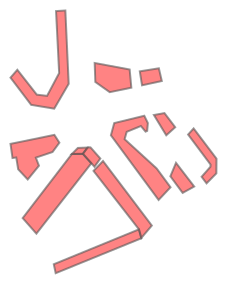

In [428]:
h = 2
w = 1
buildingPoly = dict()
buildingHeight = dict()
bPointsSelect = []
for Nbuild in buildingshape:
    # Building the Polygon of each Building
    buildingPoly[Nbuild] = Polygon(buildingshape[Nbuild])
    
    # Computing the height of each building :
    # First Select the points which are inside the bounds (-1m buffer to get the inner points only)
    bPoints = AllPoints.intersection(buildingPoly[Nbuild].buffer(-1))
    # Get the index of those points
    idx_bPoints = np.array([p.z for p in bPoints]).astype(int)
    # Height = min of z of those points
    buildingHeight[Nbuild] = loc_df.loc[idx_bPoints,"Z"].min()
    
    # Select the points which are on top of each building with margin h (top) and w (side)
    bPoints = AllPoints.intersection(buildingPoly[Nbuild].buffer(w))
    idx_bPoints = np.array([p.z for p in bPoints]).astype(int)
    idx_bPointsSelect = loc_df.loc[idx_bPoints,:].loc[loc_df.Z[idx_bPoints]  <= buildingHeight[Nbuild] + h,:].index.values
    bPointsSelect.append(list(idx_bPointsSelect))

allBuildingPoly = MultiPolygon(list(buildingPoly.values()))
allBuildingPoly


In [429]:
buildingHeight

{0: 12.0,
 1: 13.999999999999998,
 2: 6.0,
 3: 7.5,
 4: 15.0,
 5: 20.5,
 6: 28.499999999999996,
 7: 28.0,
 8: 13.5,
 9: 15.499999999999998,
 10: 13.0,
 11: 18.5,
 12: 12.0}

In [430]:
bPointsSelect.append(list(loc_df.loc[loc_df.Z <= h ,:].index.values))
bPointsSelect = np.hstack(bPointsSelect)
bPointsSelect = list(set(list(bPointsSelect)))
len(bPointsSelect)

37847

In [412]:
%matplotlib notebook


<IPython.core.display.Javascript object>


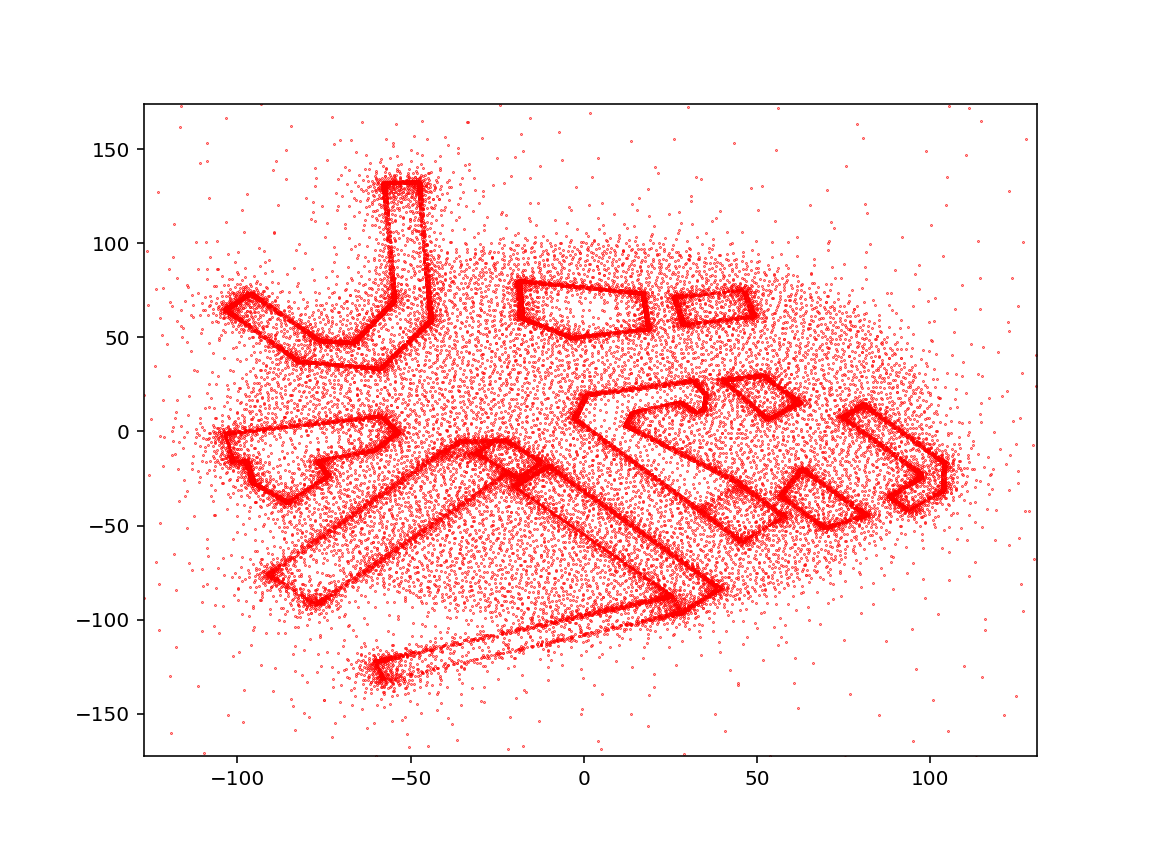

In [432]:
plt.figure(figsize=(8,6))
Zmax = 14
#plt.scatter(loc_df.loc[loc_df.Z < Zmax ,'X'].values, loc_df.loc[loc_df.Z < Zmax,'Y'].values, s=0.9)
plt.scatter(loc_df.loc[bPointsSelect,'X'].values, loc_df.loc[bPointsSelect,'Y'].values, s=0.1,c='r')


In [433]:
A_list = set_to_onehot(bPointsSelect,data_df.shape[0])
save_vtu(ref_vtu[0],'HumanSelectionH2W1',A_list)

==> Saved to : ../data/temp_data/LSBU_res_2019:08:01-14:47:45_HumanSelectionH2W1.vtu


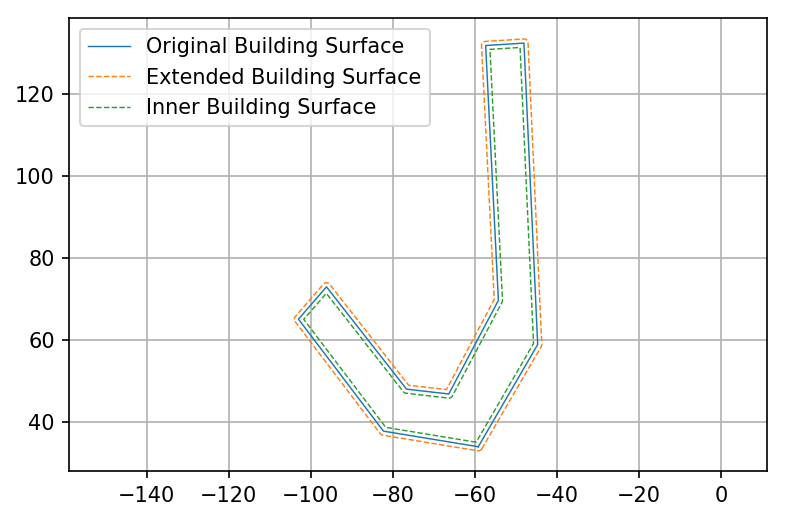

In [350]:
fig = plt.figure(dpi=150) #figsize=(7,9)
ax = fig.add_subplot(111)
x,y = (buildingPoly[6]).exterior.xy
ax.plot(x,y,linewidth = 0.7);
x,y = (buildingPoly[6].buffer(1)).exterior.xy
ax.plot(x,y,'--',linewidth = 0.7);
x,y = (buildingPoly[6].buffer(-1)).exterior.xy
ax.plot(x,y,'--',linewidth = 0.7);

ax.axis('equal')
plt.legend(["Original Building Surface",'Extended Building Surface', 'Inner Building Surface', ])
plt.grid()

